主成分分析やデータの相関を図的に確認

In [71]:
import numpy as np
import pandas as pd

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
#日本語表示用
import japanize_matplotlib

In [73]:
import sklearn

In [74]:
from sklearn.decomposition import PCA

In [75]:
filename = 'osaka_data_before.csv'

In [76]:
df1 = pd.read_csv('./data/'+filename, encoding='cp932')
df = df1.drop(columns='日付')
#bed_rate = df1['病床占有率']
df

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者,病床占有率
0,2070,190,1154,121,0,135,20.9
1,2328,216,1265,104,1,146,23.4
2,2293,195,1342,118,0,137,24.5
3,1562,194,1445,91,0,142,29.0
4,1266,81,1423,102,1,55,29.7
...,...,...,...,...,...,...,...
401,20973,2353,26608,2845,12,1579,70.9
402,17065,1819,26136,2554,3,1125,76.3
403,13677,924,24944,2086,2,540,80.0
404,7221,1649,23352,3238,6,1065,70.1


ヒートマップや散布図の作成
https://qiita.com/oki_kosuke/items/43cb63134f9a03ebc79a

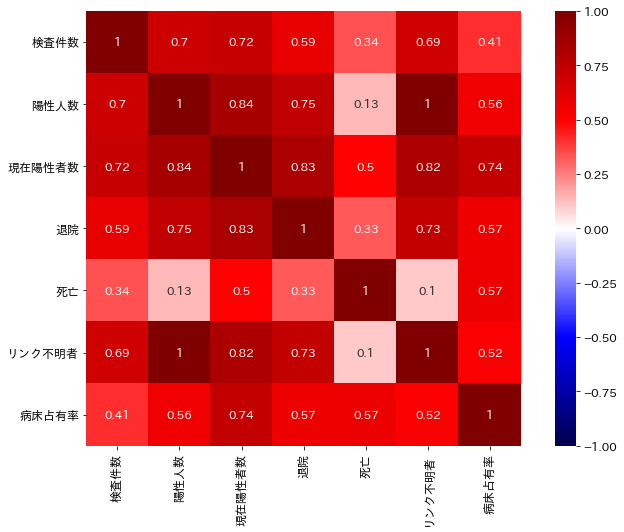

In [90]:
# ライブラリのインポート
import seaborn as sns

# 相関行列
correlation_coefficients = df.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

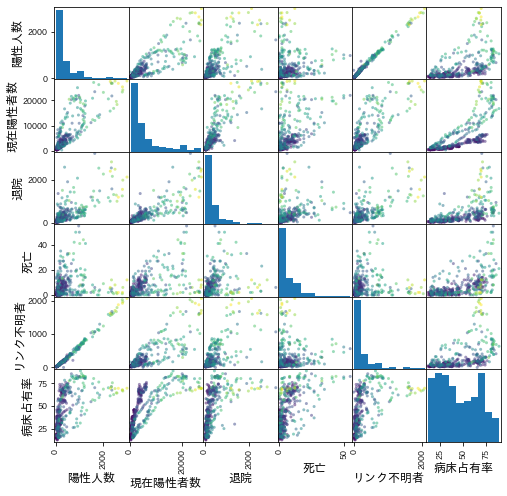

In [91]:
from pandas import plotting
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()

リンク不明者数と陽性者数の相関

In [78]:
# 行列の標準化
dfs = df.iloc[:, :].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
bed_rate = dfs['病床占有率']
dfs = dfs.drop(columns='病床占有率')
#dfs = dfs.T
dfs.head()

,検査件数,陽性人数,現在陽性者数,退院,死亡,リンク不明者
0,0.065712,0.055071,0.029554,0.031988,0.000000,0.065344
1,0.076177,0.063801,0.033629,0.026708,0.018182,0.070668
2,0.074758,0.056749,0.036456,0.031056,0.000000,0.066312
3,0.045106,0.056414,0.040238,0.022671,0.000000,0.068732
4,0.033099,0.018469,0.039430,0.026087,0.018182,0.026621


In [79]:
pca = PCA()
pca.fit(dfs)
features = pca.transform(dfs)

In [80]:
features

array([[-0.30255939, -0.11045763,  0.0719465 , -0.0053892 ,  0.00449776,
        -0.00708133],
       [-0.28846145, -0.09854179,  0.06712638, -0.01900102, -0.00138162,
        -0.00477215],
       [-0.29369806, -0.10873635,  0.06641615, -0.00555047,  0.00917603,
        -0.00676108],
       ...,
       [ 0.78529208,  0.02134643,  0.18992639,  0.41857365,  0.25513389,
         0.00488669],
       [ 0.96366122, -0.14187805,  0.57219583,  0.47977543, -0.09240777,
         0.00308969],
       [ 1.16994067, -0.11876198,  0.11804513,  0.21547515, -0.05299072,
         0.03283999]])

In [94]:
loadings = pd.DataFrame(pca.components_.T, index=dfs.columns)
loadings

,0,1,2,3,4,5
検査件数,0.458230,0.137761,-0.867358,0.136708,-0.005988,0.003684
陽性人数,0.429693,-0.353296,0.124311,-0.325291,-0.238291,0.715888
現在陽性者数,0.562271,0.211249,0.330359,0.031211,0.726580,-0.034568
退院,0.308728,0.023463,0.296215,0.802690,-0.414825,0.001492
死亡,0.147404,0.816470,0.155414,-0.348470,-0.407457,-0.006495
リンク不明者,0.414971,-0.380004,0.105848,-0.329817,-0.277780,-0.697317


In [81]:
bed_rate

0      0.110381
1      0.143233
2      0.157687
3      0.216820
4      0.226018
         ...   
401    0.767411
402    0.838371
403    0.886991
404    0.756899
405    0.735874
Name: 病床占有率, Length: 406, dtype: float64

In [82]:
'''from statistics import mean, std

list(bed_rate.apply(lambda x: (x-mean(x))/std(x)))'''

'from statistics import mean, std\n\nlist(bed_rate.apply(lambda x: (x-mean(x))/std(x)))'

In [83]:
#df1.iloc[:, 6]

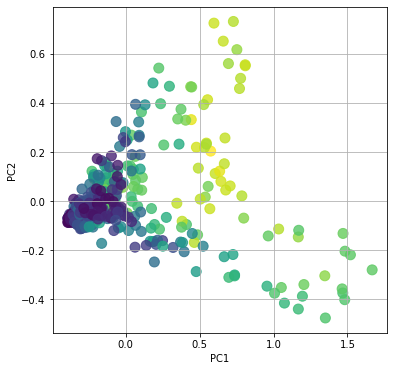

In [84]:
plt.figure(figsize=(6,6))
plt.scatter(features[:, 0], features[:, 1], s=100, alpha=0.8, c=list(bed_rate))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [85]:
#寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.746372
PC2,0.125725
PC3,0.081317
PC4,0.030822
PC5,0.015210
PC6,0.000555


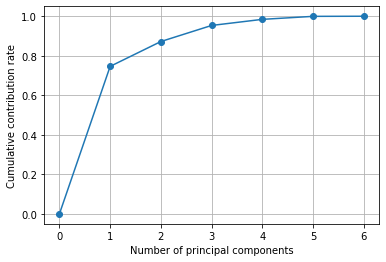

In [86]:
from pandas.core.arrays import integer
# 累積寄与率を図示する
import matplotlib.ticker as ticker
# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

https://www.ouj.ac.jp/mijika/tokei/xml/k3_03025.xml
https://aidemy.net/magazine/672/

In [87]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.171987
PC2,0.028971
PC3,0.018738
PC4,0.007102
PC5,0.003505
PC6,0.000128


In [88]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,陽性人数,現在陽性者数,退院,死亡,リンク不明者,病床占有率
PC1,0.458230,0.429693,0.562271,0.308728,0.147404,0.414971
PC2,0.137761,-0.353296,0.211249,0.023463,0.816470,-0.380004
PC3,-0.867358,0.124311,0.330359,0.296215,0.155414,0.105848
PC4,0.136708,-0.325291,0.031211,0.802690,-0.348470,-0.329817
PC5,-0.005988,-0.238291,0.726580,-0.414825,-0.407457,-0.277780
PC6,0.003684,0.715888,-0.034568,0.001492,-0.006495,-0.697317


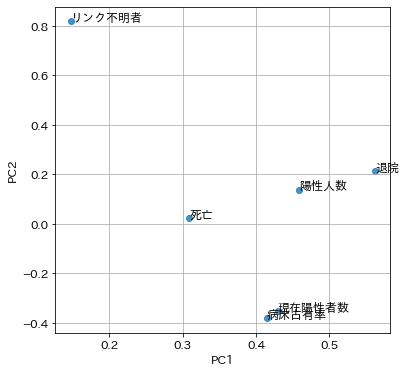

In [100]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()